Data Analysis and exploratory of students performance in exams.
Data from kaggle website:https://www.kaggle.com/spscientist/students-performance-in-exams

#Importing important libraries

In [42]:
import pandas as pd
import numpy as np
import pip
#pip.main(['install','seaborn'])
import seaborn as sns
import matplotlib.pyplot as plt

#1 read, understanding and analysis the data

In [18]:
Data=pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')

In [19]:
Data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
Data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [22]:
np.shape(Data)

(1000, 8)

In [23]:
Data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [25]:
Data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [26]:
Data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [28]:
Data ['gender'].unique()

array(['female', 'male'], dtype=object)

In [30]:
Data ['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [31]:
#clean the Data set
Data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

We notice that is no null value found in our dataset, so we don't drop or replace any thing from the data

In [33]:
# correlations analysis
Corrl=Data.corr()
Corrl

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


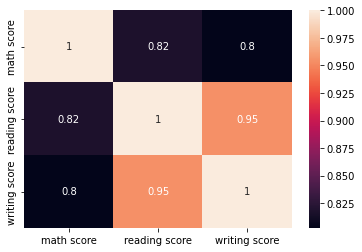

In [37]:
# Visualization of correlations
sns.heatmap(Corrl,xticklabels=Corrl.columns,yticklabels=Corrl.columns,annot=True)

We notice that have been positive correlation between math Score and reading, writing Score

#2 visualisation of the data

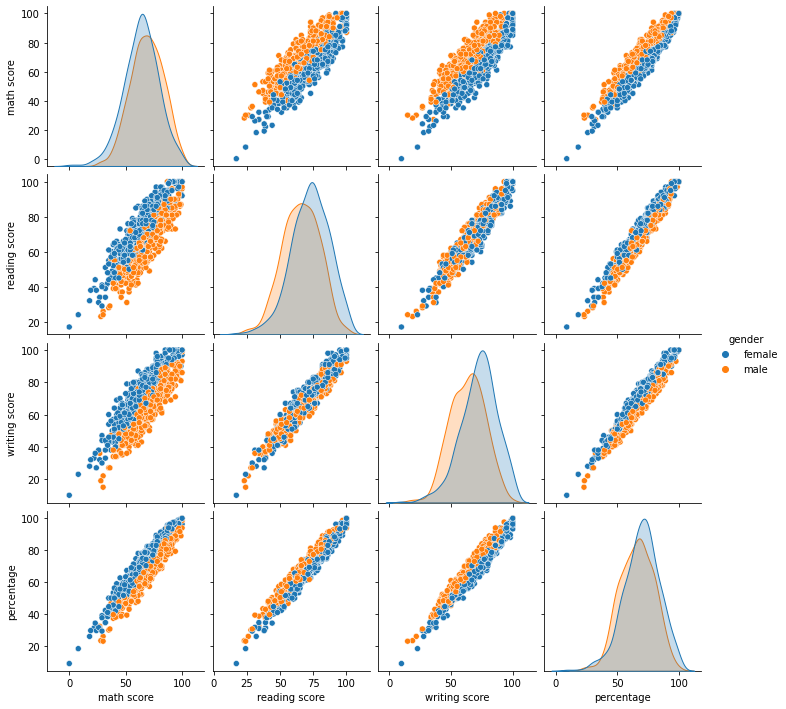

In [104]:

# visualise the correlation of each pair
sns.pairplot(Data,hue='gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


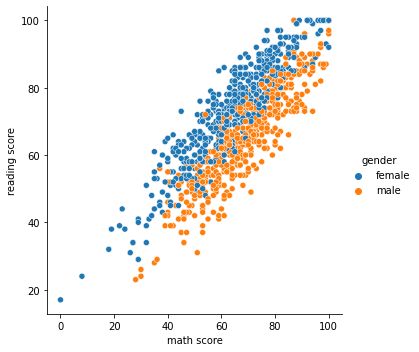

In [65]:
#scatter plot of math Score and reading score

sns.relplot(Data['math score'],Data['reading score'],hue=Data['gender'] )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


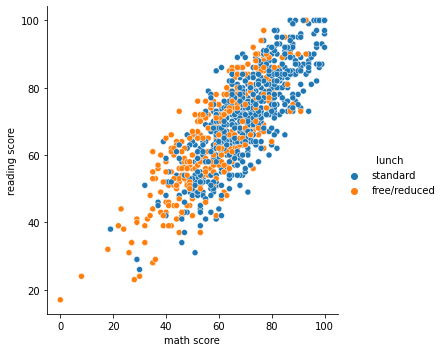

In [108]:
sns.relplot(Data['math score'],Data['reading score'],hue=Data['lunch'] )

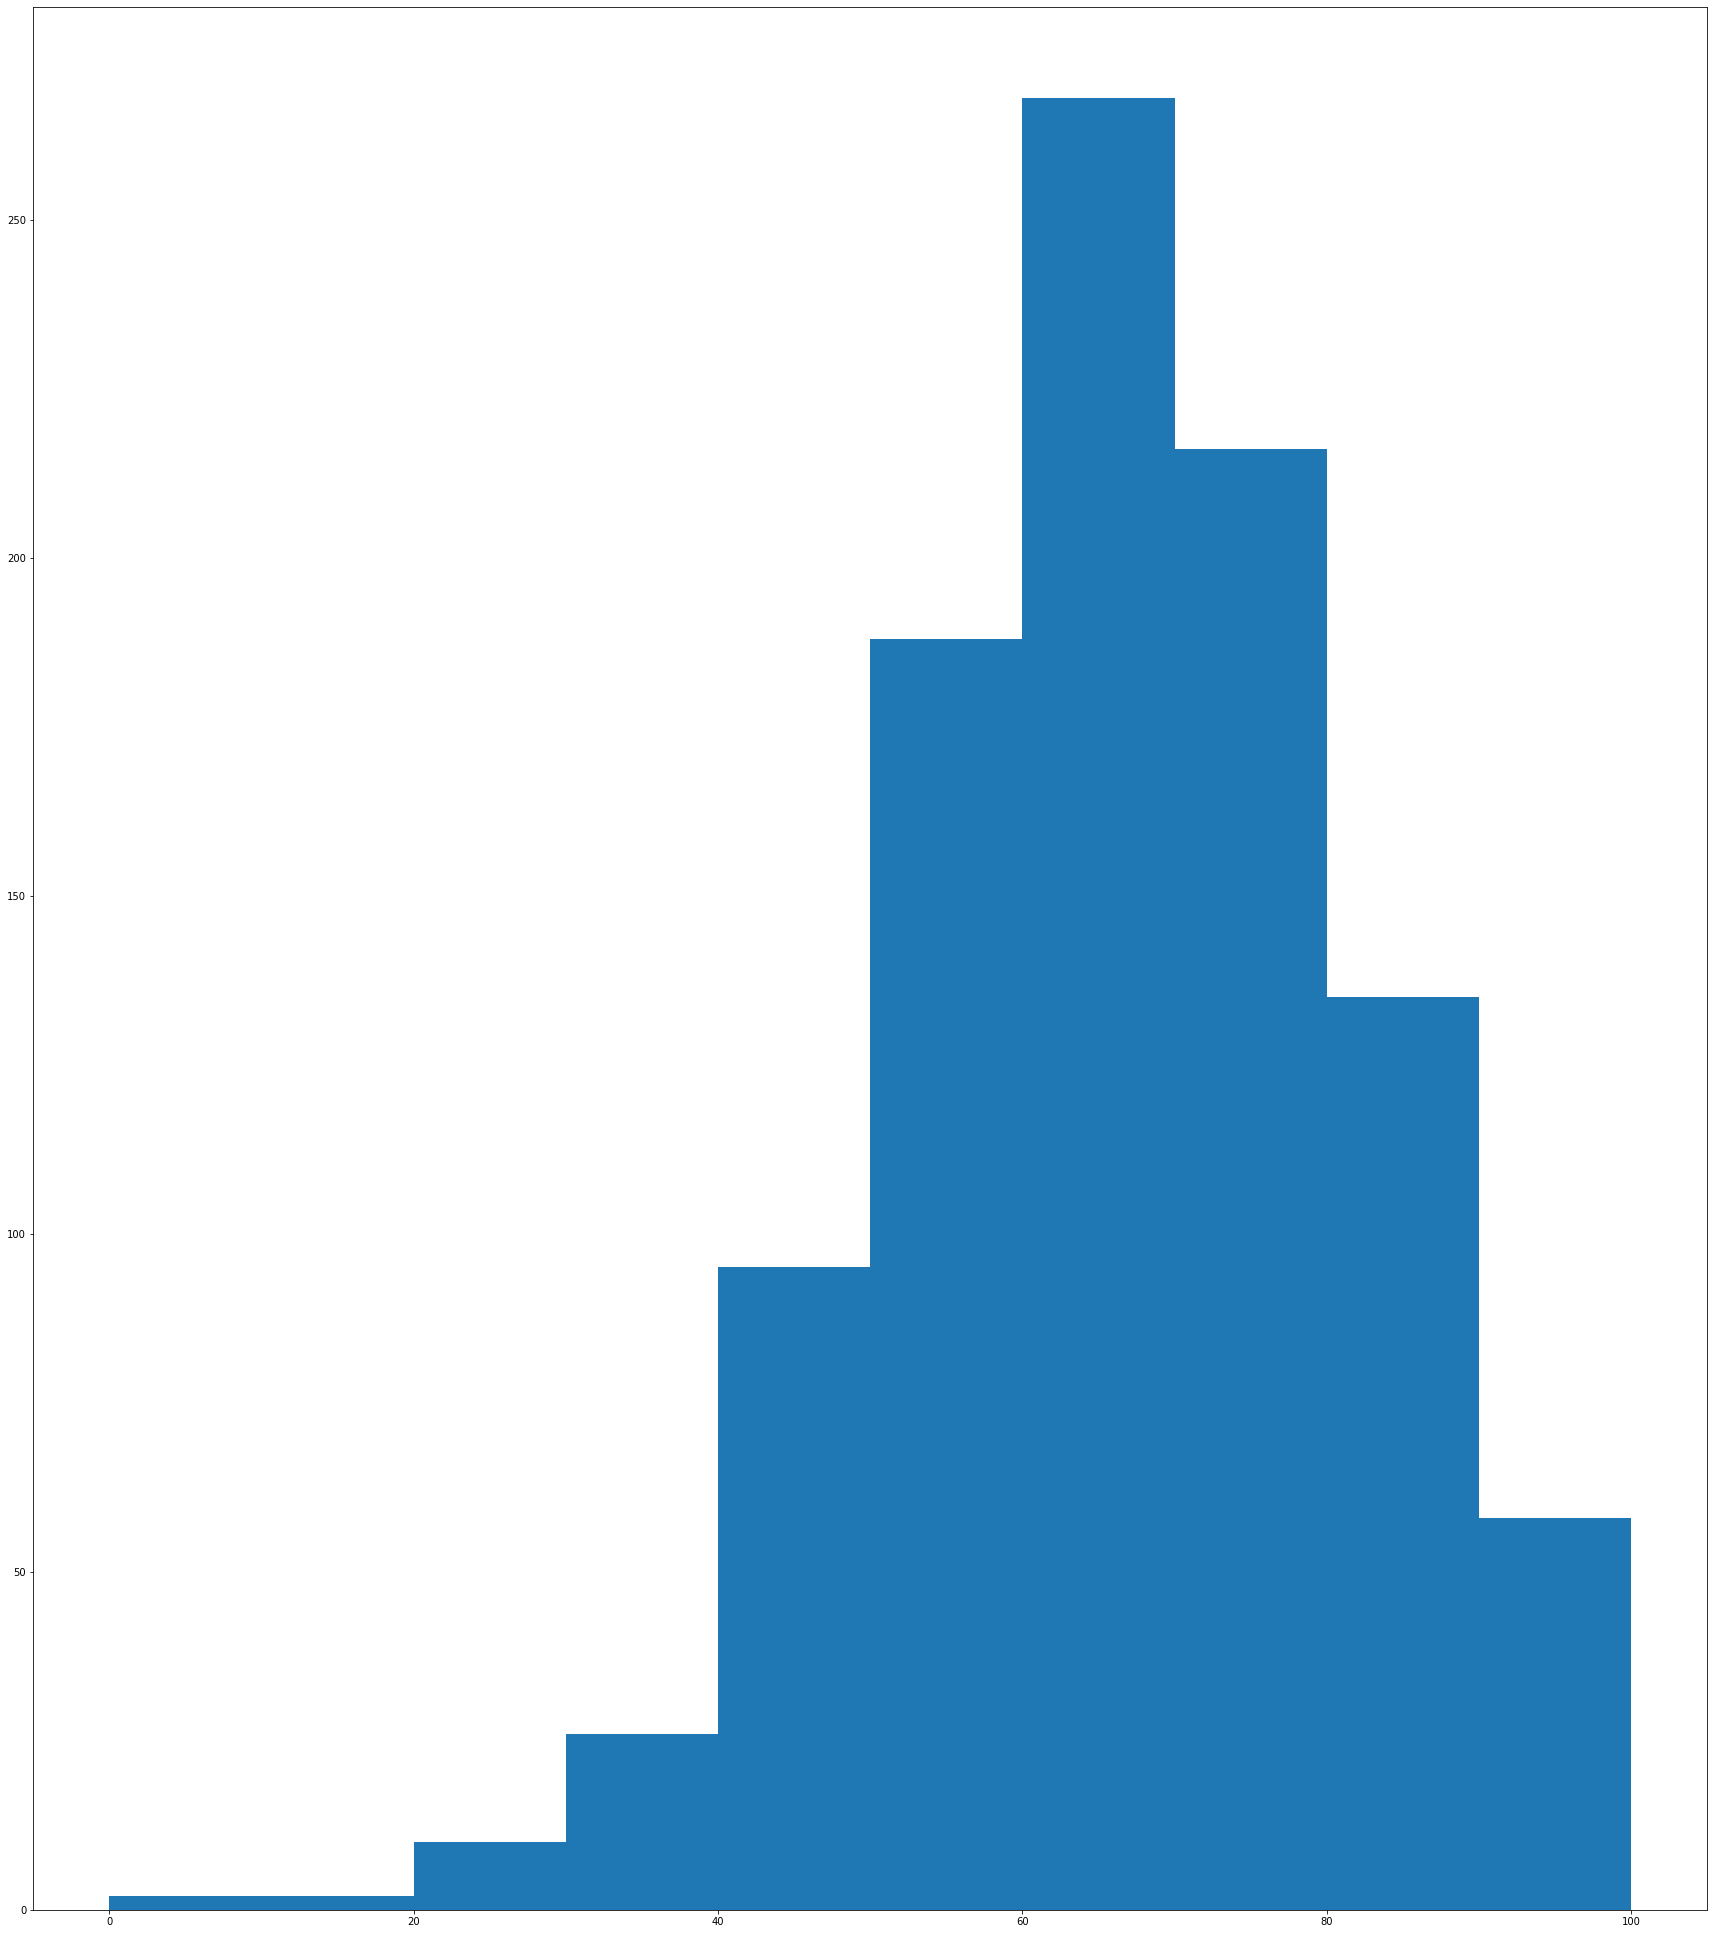

In [107]:
#plot the histogram 
plt.hist(Data['math score'], bins=10)
plt.show()

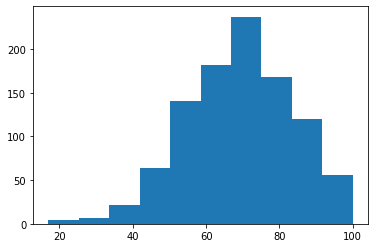

In [71]:
plt.hist(Data['reading score'], bins=10)
plt.show()

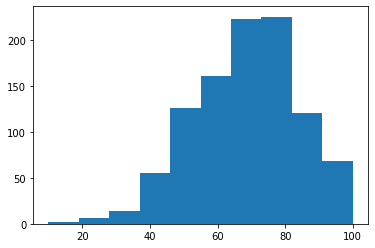

In [72]:
plt.hist(Data['writing score'], bins=10)
plt.show()

Maximum number of students have scored between 60 and 80 in all three subjects

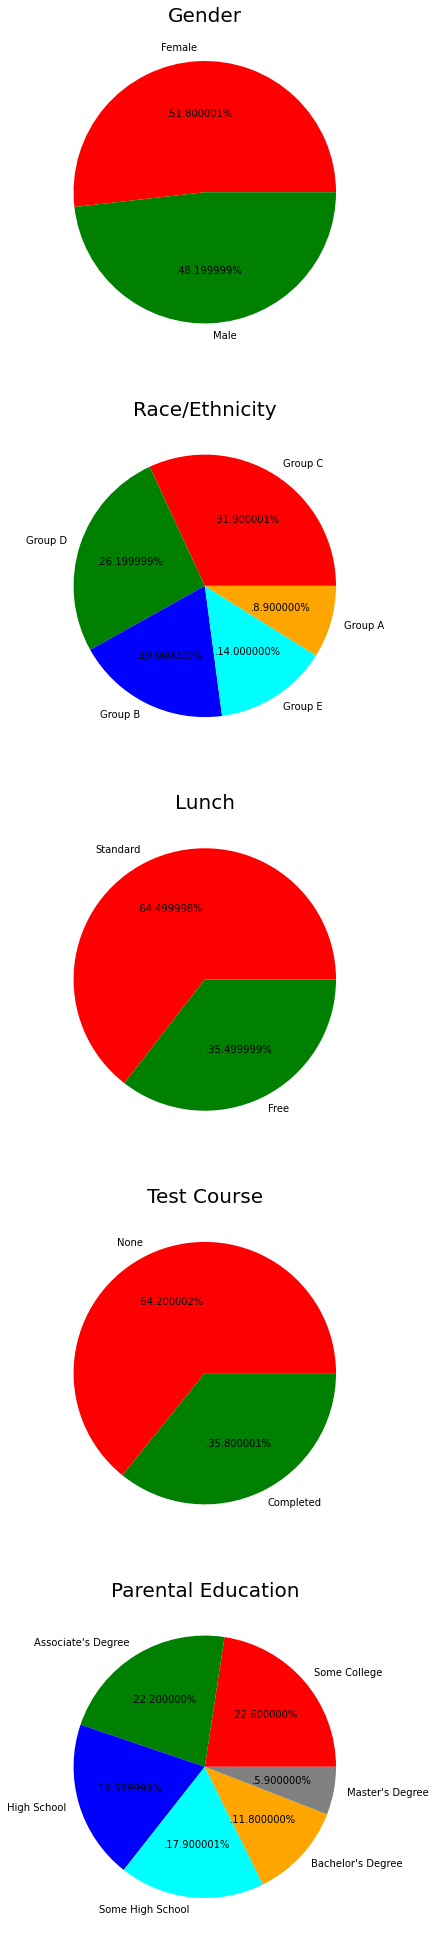

In [85]:
plt.rcParams['figure.figsize'] = (30, 35)

plt.subplot(5, 1, 1)
size = Data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)




plt.subplot(5, 1, 2)
size = Data['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)



plt.subplot(5,1 , 3)
size = Data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)



plt.subplot(5, 1, 4)
size = Data['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)



plt.subplot(5, 1, 5)
size = Data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)




plt.show()

#Some observations

1:Number of Male and Female students is almost equal

2:Number students are greatest in Group C

3:Number of students who have standard lunch are greater

4:Number of students who have not enrolled in any test preparation course is greater

5:Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

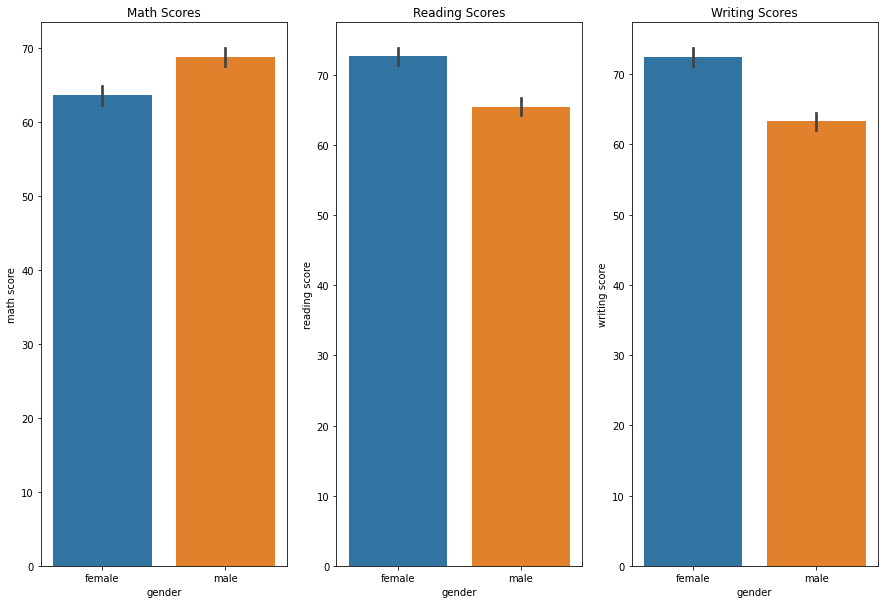

In [87]:
plt.figure(figsize=(15,10))
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="gender", y="math score", data=Data)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading score", data=Data)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing score", data=Data)
plt.show()

Male students have scored higher than female in math score subject, but female students have scored higher in reading, writing subject

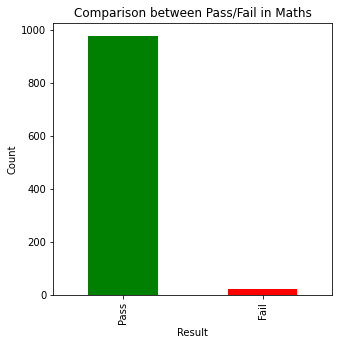

Pass    978
Fail     22
Name: pass_math, dtype: int64

In [110]:
passingmark=35
Data['pass_math'] = np.where(Data['math score']>= passingmark, 'Pass', 'Fail')
Data['pass_math'].value_counts(dropna = False).plot.bar(color=['green','red'],figsize=(5,5))

plt.title('Comparison between Pass/Fail in Maths')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()
Data['pass_math'].value_counts()

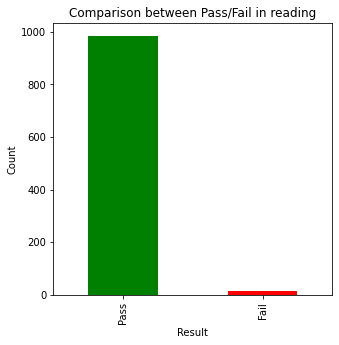

Pass    985
Fail     15
Name: pass_read, dtype: int64

In [111]:

passingmark=35
Data['pass_read'] = np.where(Data['reading score']>= passingmark, 'Pass', 'Fail')
Data['pass_read'].value_counts(dropna = False).plot.bar(color=['green','red'], figsize = (5,5))

plt.title('Comparison between Pass/Fail in reading')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()
Data['pass_read'].value_counts()

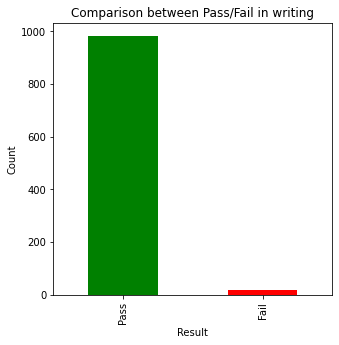

Pass    983
Fail     17
Name: pass_write, dtype: int64

In [112]:

passingmark=35
Data['pass_write'] = np.where(Data['writing score']>= passingmark, 'Pass', 'Fail')
Data['pass_write'].value_counts(dropna = False).plot.bar(color=['green','red'], figsize = (5,5))

plt.title('Comparison between Pass/Fail in writing')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()
Data['pass_write'].value_counts()

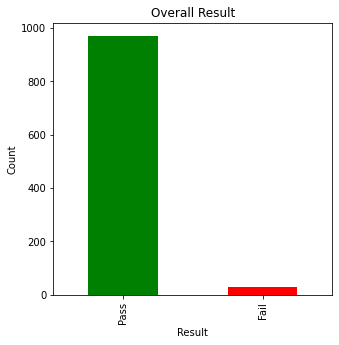

Pass    971
Fail     29
Name: result, dtype: int64

In [113]:
#assgining pass or fail in overall score
Data['result'] = Data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_read'] == 'Fail' or x['pass_write'] == 'Fail'
                           else 'Pass', axis = 1)

Data['result'].value_counts(dropna = False).plot.bar(color = ['green','red'], figsize = (5,5))
plt.title('Overall Result')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

Data['result'].value_counts()

C    573
B    208
A    116
D     74
E     29
Name: grade, dtype: int64

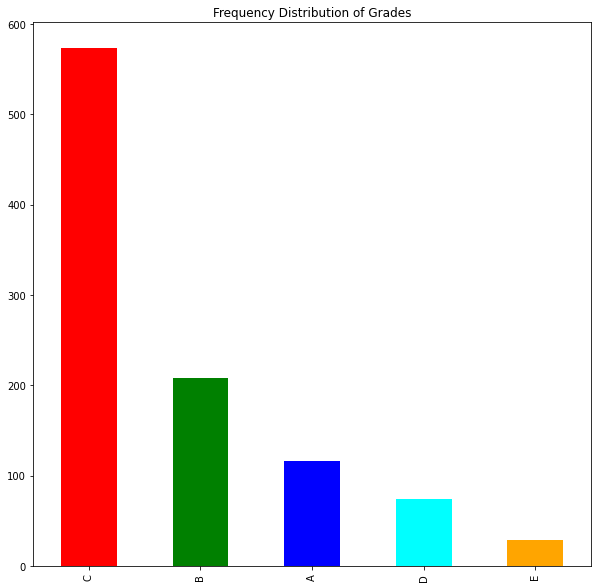

In [101]:
Data['percentage']=(Data['math score'] + Data['reading score']+ Data['writing score'])/3
# Assigning grades according to marks scored by students 
# 0  - 35 marks : grade E
# 33 - 50 marks : grade D
# 50 - 75 marks : grade C
# 75 - 90 marks : grade B
# 90 - 100 marks : grade A

def calcgrade(percentage,result):
    
  if result == 'Fail':
    return 'E'
  if(percentage >= 85):
    return 'A'
  if(percentage >= 75):
    return 'B'
  if(percentage >= 50):
    return 'C'
  if(percentage >=35):
    return 'D'
  else:
    return 'E'

Data['grade']= Data.apply(lambda x: calcgrade(x['percentage'], x['result']), axis = 1 )

Data['grade'].value_counts().plot.bar(title='Frequency Distribution of Grades',color=['red', 'green', 'blue', 'cyan','orange'],figsize=(10,10))
Data['grade'].value_counts()

Maximum number of students with grade"C"